TensorFlow Version: 2.13.1
Num GPUs Available: 0
Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 70295 training images
Found 17572 validation images
Number of classes: 38
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_

c:\Users\dabas\crop cure\crop-cure\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2196/2196 [==============================] - 1266s 576ms/step - loss: 0.7319 - accuracy: 0.8006 - val_loss: 0.6078 - val_accuracy: 0.8392 - lr: 1.0000e-04
Epoch 3/15
2196/2196 [==============================] - 1166s 531ms/step - loss: 0.5582 - accuracy: 0.8428 - val_loss: 0.5107 - val_accuracy: 0.8568 - lr: 1.0000e-04
Epoch 4/15
2196/2196 [==============================] - 681s 310ms/step - loss: 0.4812 - accuracy: 0.8599 - val_loss: 0.4600 - val_accuracy: 0.8689 - lr: 1.0000e-04
Epoch 5/15
2196/2196 [==============================] - 707s 322ms/step - loss: 0.4323 - accuracy: 0.8725 - val_loss: 0.4150 - val_accuracy: 0.8800 - lr: 1.0000e-04
Epoch 6/15
2196/2196 [==============================] - 697s 317ms/step - loss: 0.3998 - accuracy: 0.8807 - val_loss: 0.3912 - val_accuracy: 0.8846 - lr: 1.0000e-04
Epoch 7/15
2196/2196 [==============================] - 701s 319ms/step - loss: 0.3794 - accuracy: 0.8851 - val_loss: 0.3807 - val_accuracy: 0.8880 - lr: 1.0000e-04
Epoch 8/15
2196/219

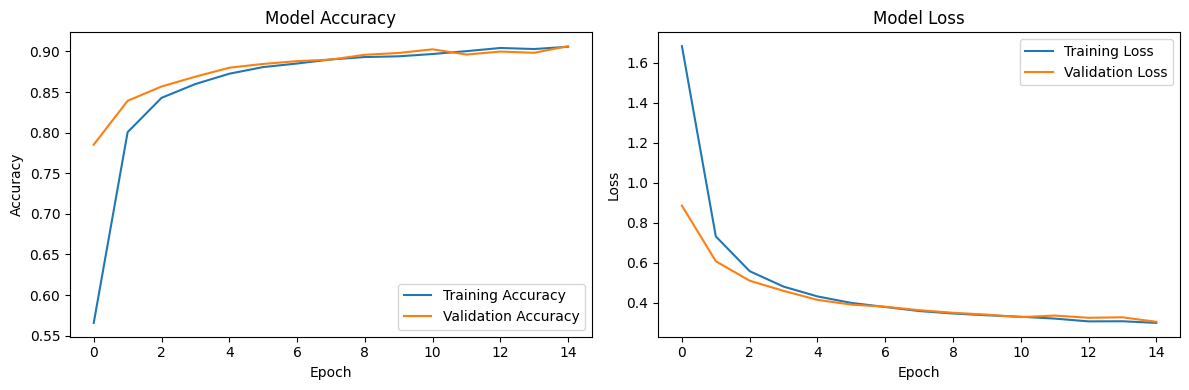


--- CLASS NAMES (COPY THIS LIST TO YOUR BACKEND) ---
'Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
'Apple___healthy',
'Blueberry___healthy',
'Cherry_(including_sour)___Powdery_mildew',
'Cherry_(including_sour)___healthy',
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_',
'Corn_(maize)___Northern_Leaf_Blight',
'Corn_(maize)___healthy',
'Grape___Black_rot',
'Grape___Esca_(Black_Measles)',
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
'Grape___healthy',
'Orange___Haunglongbing_(Citrus_greening)',
'Peach___Bacterial_spot',
'Peach___healthy',
'Pepper,_bell___Bacterial_spot',
'Pepper,_bell___healthy',
'Potato___Early_blight',
'Potato___Late_blight',
'Potato___healthy',
'Raspberry___healthy',
'Soybean___healthy',
'Squash___Powdery_mildew',
'Strawberry___Leaf_scorch',
'Strawberry___healthy',
'Tomato___Bacterial_spot',
'Tomato___Early_blight',
'Tomato___Late_blight',
'Tomato___Leaf_Mold',
'Tomato___Septoria_leaf_spot',
'Tomato___Spide

In [1]:
# Step 1: Setup and Imports
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(f"TensorFlow Version: {tf.__version__}")
print(f"Num GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

# Step 2: Prepare the Data Paths
IMG_SIZE = 224
BATCH_SIZE = 32  # Increased batch size for better performance
DATA_DIR = './New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
VALID_DIR = os.path.join(DATA_DIR, 'valid')

# Step 3: Load the Data with proper preprocessing
# Use ImageDataGenerator for more control over preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use if your dataset doesn't have separate validation
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_ds = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse'  # Use 'sparse' for integer labels
)

val_ds = val_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

# Get the class names for your backend
class_names = list(train_ds.class_indices.keys())
num_classes = len(class_names)

print(f"Found {train_ds.samples} training images")
print(f"Found {val_ds.samples} validation images")
print(f"Number of classes: {num_classes}")
print("Class names:", class_names)

# Step 4: Build the Model using Transfer Learning
# Create a data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'  # Add global average pooling directly
)
base_model.trainable = False  # Freeze the base model initially

# Create the final model
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()  # Print a summary of the model structure

# Step 5: Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Use callbacks to prevent overfitting and save time
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

# Step 6: Train the Model
print("Starting model training...")
EPOCHS = 15
history = model.fit(
    train_ds,
    steps_per_epoch=train_ds.samples // BATCH_SIZE,
    validation_data=val_ds,
    validation_steps=val_ds.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)
print("Training finished!")

# Step 7: Fine-tuning (unfreeze some layers)
print("Starting fine-tuning...")
base_model.trainable = True
# Freeze first 100 layers, unfreeze the rest
for layer in base_model.layers[:100]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train for a few more epochs
history_fine = model.fit(
    train_ds,
    steps_per_epoch=train_ds.samples // BATCH_SIZE,
    validation_data=val_ds,
    validation_steps=val_ds.samples // BATCH_SIZE,
    epochs=5,
    callbacks=[early_stopping, reduce_lr]
)

print("Fine-tuning finished!")

# Step 8: Save the Final Model
model.save('plant_disease_model.h5')
print("Model saved as plant_disease_model.h5")

# Step 9: Evaluate the model
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {val_accuracy:.2%}")

# Step 10: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Step 11: Print the Class Names List for your backend
print("\n--- CLASS NAMES (COPY THIS LIST TO YOUR BACKEND) ---")
for i, class_name in enumerate(class_names):
    print(f"'{class_name}'" + ("," if i < len(class_names) - 1 else ""))
print("------------------------------------")

# Step 12: Test the model with a sample image
print("Testing with a sample image...")
sample_image_path = next(iter(train_ds.filepaths))  # Get a sample image path
img = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0])

print(f"Sample prediction: {predicted_class} with {confidence:.2%} confidence")